#                                   GRIP - The Sparks Foundation
## Task-3: To explore Unsupervised Machine Learning Algorithm 
### To predict the optimum number of clusters of the famous 'Iris' dataset and representing it visually. 




## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the Data
Importing the data from iris.csv file into our notebook and displaying the obtained data.Since we are going to use unsupervised machine learning algorithm so I have deliberately dropped species column. 

In [2]:
df=pd.read_csv('Iris.csv')
df.drop(['Species','Id'],axis='columns',inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Correlation between all the labels

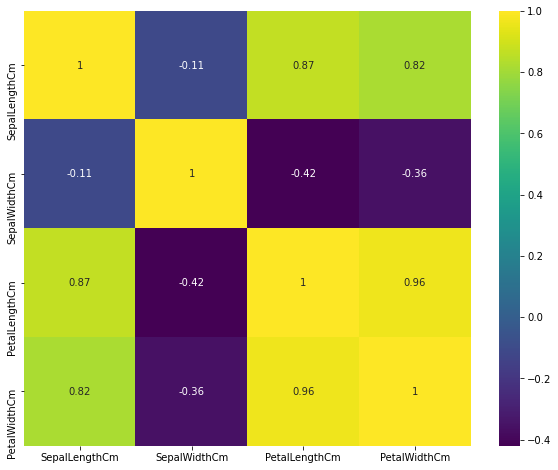

In [3]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

# Finding optimum number of clusters using The Elbow Method

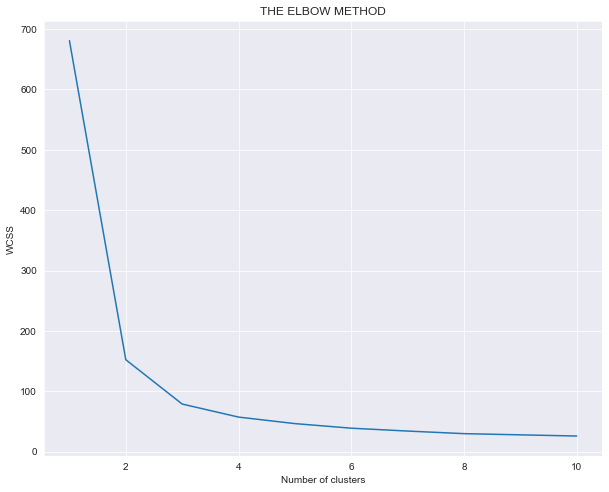

In [7]:
x=df.iloc[:,[0,1,2,3]].values


sns.set_style('darkgrid')
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init ='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))   
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

The optimum number of cluster is obtained where the the elbow occurs. So here the optimum number of cluster (k)=3

# Training the model with optimum number of cluster and Predicting the species cluster


In [8]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Visualising the clusters and centroid for each of them

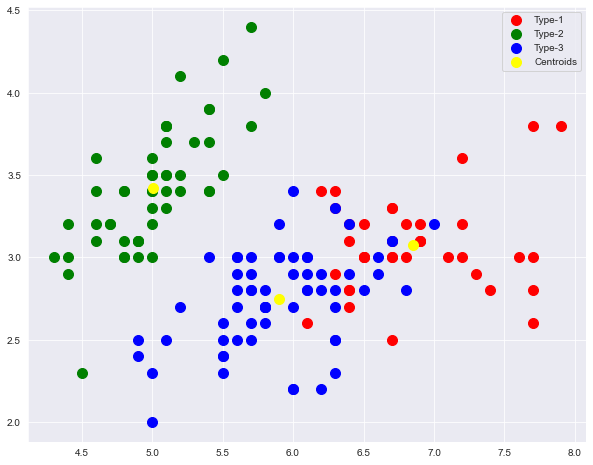

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Type-1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green',label='Type-2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='blue',label='Type-3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')

plt.legend()

# THANK YOU!